In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
specialized_grades_cols = ['What was your final grade for 101?',
       'What was your final grade for 101L?',
       'What was your final grade for 111? ',
       'What was your final grade for 113?',
       'What was your final grade for 121?',
       'What was your final grade for 161?',
       'What was your final grade for 181?',
       'Were you in a specialized high school program?']
specialized_programs = class_df[specialized_grades_cols].dropna(subset = ['What was your final grade for 101?'], axis=0)
print(specialized_programs)


In [ ]:
get_avg = lambda row: row.sum()/5.5
    
specialized_programs['What was your final grade for 101L?'] /= 2
specialized_programs['What was your final grade for 101?'] /= 2
specialized_programs['What was your final grade for 113?'] /= 2    
grades_columns = [col for col in specialized_programs.columns if col.startswith('What was ')]

specialized_programs["averages"] = specialized_programs[grades_columns].apply(get_avg, axis="columns")
print(specialized_programs["averages"])

In [ ]:
specialized_programs.drop(labels=[col for col in specialized_programs.columns if col.startswith('What was')], axis=1, inplace=True)
specialized_programs.rename(columns={"Were you in a specialized high school program?": "Specialized Program"}, inplace=True)
specialized_programs.tail()

In [6]:
len(specialized_programs)

91

In [ ]:
specialized_programs["Specialized Program"] = specialized_programs['Specialized Program'].str.split(';')
temp = specialized_programs[specialized_programs["Specialized Program"].apply(lambda col: len(col) > 1)]
print(temp)

In [8]:
specialized_programs = (specialized_programs
 .set_index(['averages'])['Specialized Program']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_1', axis=1)
 .rename(columns={0:'Specialized Program'}))

In [ ]:
specialized_programs.head(60)

In [ ]:
specialized_programs.tail(41)

In [11]:
# manually remove/clean some values

# remove 74/91/92 (both of these relate to 90 and are not relevant)
specialized_programs.drop([74, 91, 92], inplace=True)

# change 73 to None
specialized_programs.loc[73, 'Specialized Program'] = 'None'

# change full french to french immersion (assume they are the same) 
specialized_programs.loc[7, 'Specialized Program'] = 'French Immersion'

In [ ]:
# change small groups to 'other'
major_cols = ['AP', 'French Immersion', 'Gifted', 'IB', 'None']

def group_minor_groups(row):http://localhost:8888/notebooks/Class-Profile1A-Data-Analysis/Academics/specialized_hs_v_uni.ipynb#
    """
    Change all minor groups to other
    """
    if row['Specialized Program'] not in major_cols:
        row['Specialized Program'] = 'Other'
    
    return row

clean_programs_df = specialized_programs.apply(group_minor_groups, axis=1)

# check the new df
program_avg = clean_programs_df.groupby("Specialized Program")["averages"].mean()
program_median = clean_programs_df.groupby("Specialized Program")["averages"].median()
program_count = clean_programs_df.groupby("Specialized Program")["averages"].count()
program_info = pd.concat([pd.DataFrame(program_avg), pd.DataFrame(program_median), pd.DataFrame(program_count)], axis=1)
program_info.columns = ['avg', 'median', 'count']
program_info

In [13]:
program_info['median']

Specialized Program
AP                  91.363636
French Immersion    87.545455
Gifted              90.500000
IB                  89.500000
None                88.727273
Other               85.000000
Name: median, dtype: float64

Text(0, 0.5, '1A Average')

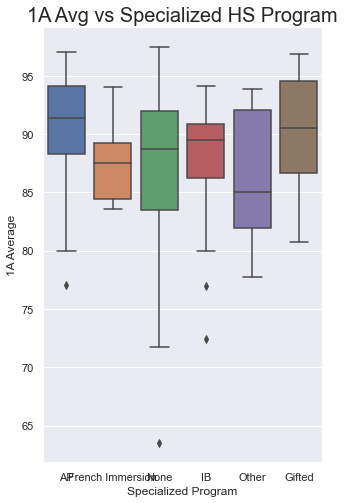

In [14]:
# graph the results in a boxplot
sns.set(rc={'figure.figsize': (5, 8)})
sns.set_style('darkgrid')
ax = sns.boxplot(x=clean_programs_df["Specialized Program"], y=clean_programs_df["averages"])
ax.set_title('1A Avg vs Specialized HS Program', fontsize=20)
ax.set_ylabel('1A Average')

In [ ]:
clean_programs_df

In [18]:
ax.figure.savefig('graphs/specialized_prog_v_1A_avg.png')